This notebook...

* Defines the dummy problem we are currently considering and the current resolution


# Dummy model for the GEA case

### What we are doing

We are defining a framework for the GEA case which hopes to be easily adaptable to the general case once the full project scope is known. Since we want total freedom to link machines optimally according to some given recipes, the main idea is to define the plant connections as a directed graph to be decided by the optimization problem with the restrictions defined by the recipes. The graph is optimized simultaneously with the minimization of the production time.

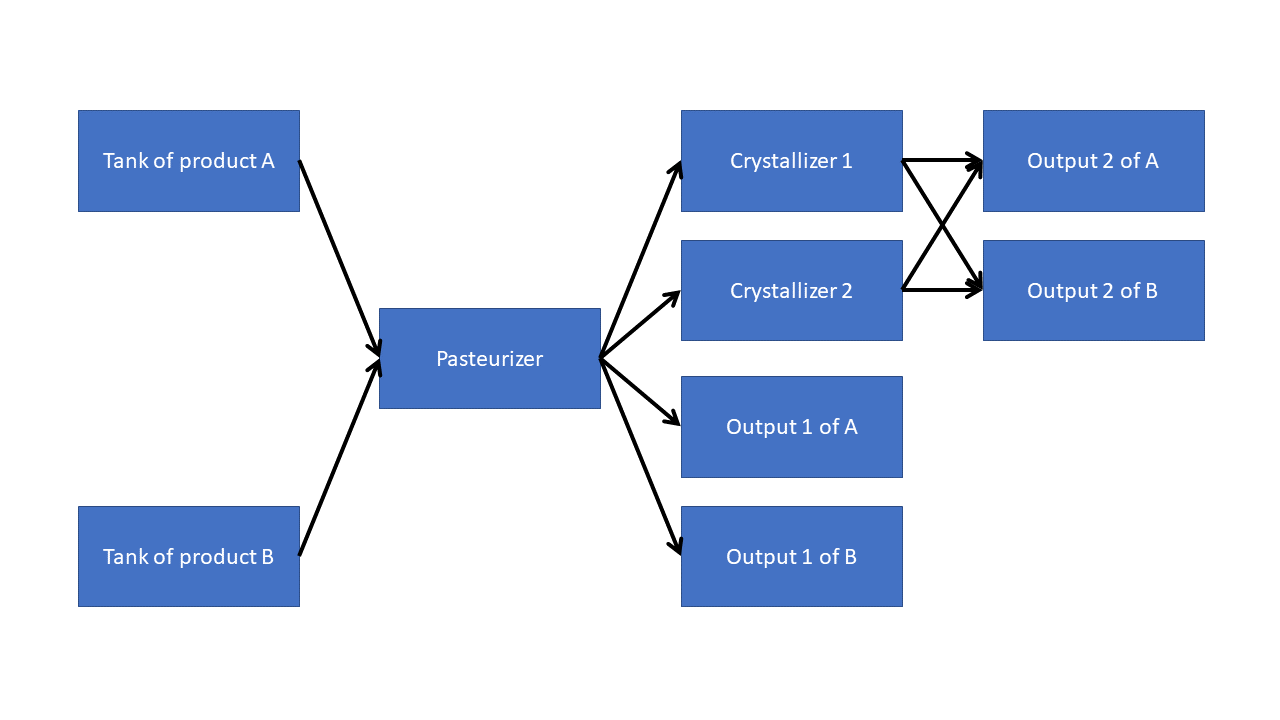

### Definition of the graph restrictions

| Set | Definition |
|---|---|
|$m, n, l, p$ |Sets over the available machines |
|$k$ |Set over the types of product to be considered|
|$i, i'$ |Set over the batches created|

We start by dividing the amount of each product into batches $N_A$ and $N_B$ batches and define $N = N_A + N_B$ as the total number of batches (in the general case $N = \sum N_k$). We now create a matrix $P(i,k)$ to assign a product to each batch. The restrictions over this matrix are:
$$
1 = \sum_{k}P(i,k)
$$

$$
N = \sum_{i}P(i,k)
$$
We can now construct the main hypermatrix which assigns a graph of connections for each batch, $B_{\text{recipe}}(i,m,n)$. The actual plant connections will then be $\cup_i B_{\text{recipe}}(i,m,n)$. To create this hypermatrix, we must first create 2 bounding matrices (which are parameters) from the knowledge of the recipes to require certain connections. This means that we can create a minimum and a maximum matrix such that:
$$
B_{\text{minimum recipe}}(m,n) \leq B_{\text{recipe}}(i,m,n) \leq B_{\text{maximum recipe}}(m,n) \quad \forall \quad i
$$
However, these matrices are not enough to bound the hypermatrix $B_{\text{recipe}}(i,m,n)$. When options are available (such as the case of pasteurizer - crystallizer 1 and pasteurizer - crystallizer 2 paths in this example) the minimum matrix must allow for both to occur and thus both connections must be 0, allowing for a solution where the pasteurizer is connected to neither crystallizer. To solve this we must include additional constraints to enforce some connections aside from the matrices $B_{\text{minimum recipe}}(m,n)$ and $B_{\text{maximum recipe}}(m,n)$. We also have to impose additional constraints to relate the paths taken with the appropriate recipe of the product of batch $i$ through the use of the matrix $P(i,k)$.

### Definition of the rest of the optimization problem

We must also define the rest of the problem (decision of the starting times of each process) with this in mind we define the following variables and parameters:

| Parameter | Definition |
|---|---|
|$D_{\text{machine}}(m)$   |Duration of each machine process inside the machine. Only $m$ is occupied during this time.|
|$D_{\text{process}}(m, n)$  |Duration of the transfer process between 2 machines. Both $m$ and $n$ are occupied during this time.|
|$F(m,n)$  |Binary parmeter which only takes value 1 when the process from $m$ to $n$ implies a change from a continuous to a batch process.|

| Variable | Definition | Domain |
|---|---|---|
|$B_{\text{start}}(i,m,n)$ | Variable to define the start of each process. | Non-Negative Reals |

The constraints are:

* The first 2 constraints ensure that no machine that is already working on a previous batch starts a process with the new batch.

$$
B_{\text{start}}(i,m,n) \geq B_{\text{start}}(i',l,m) + B_{\text{recipe}}(i',l,m)\left(D_{\text{process}}(l, m) + D_{\text{machine}}(m) + D_{\text{process}}(m, p)\right) + M(B_{\text{recipe}}(i,m,n)-1) \quad \forall \quad i'<i
$$

$$
B_{\text{start}}(i,m,n) \geq B_{\text{start}}(i',l,m) + B_{\text{recipe}}(i',l,n)\left(D_{\text{process}}(l, n) + D_{\text{machine}}(n) + D_{\text{process}}(n, p)\right) + M(B_{\text{recipe}}(i,m,n)-1) \quad \forall \quad i'<i
$$

* The next constraint deals with the sequential process in a certain batch.

$$
B_{\text{start}}(i,m,n) \geq B_{\text{start}}(i,l,m) + F(m,n)\left(D_{\text{process}}(l, m) + D_{\text{machine}}(l)\right) + M(B_{\text{recipe}}(i,m,n)-1) \quad \forall \quad i'<i
$$

* This last restriction helps impose that sequential continuous processes must start at the same time. This restriction is currently not enough and must be improved.

$$
B_{\text{start}}(i,m,n) \leq B_{\text{start}}(i,l,m) + M(1-B_{\text{recipe}}(i,m,n)) \quad \forall \quad m, n \mid F(m,n) = 1
$$

